<a href="https://colab.research.google.com/github/sahilpasricja/De-Bias/blob/main/CreditCardFraud2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installing libraries

In [ ]:
!pip install kaggle
!pip install pandas
!pip install scikit-learn
!pip install shap
!pip insall aif360


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.9 MB/s eta 0:00:00
ERROR: unknown command "insall" - maybe you meant "install"


Download dataset if not done already.

In [ ]:

!mkdir ~/.kaggle/
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

import kaggle
!kaggle datasets download -d kartik2112/fraud-detection

Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
 99% 199M/202M [00:09<00:00, 16.2MB/s]
100% 202M/202M [00:09<00:00, 21.4MB/s]


In [ ]:
!unzip /content/fraud-detection.zip -d /content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKartik
n



Archive:  /content/fraud-detection.zip
replace /content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKartik/fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#Listing  csv from added dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKartik'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKartik/fraudTest.csv
/content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKartik/fraudTrain.csv


In [ ]:
#Import test and train data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

#MODEL SELECTIONS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#Thresholds
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKartik/fraudTrain.csv')
test_data=pd.read_csv('/content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKartik/fraudTest.csv')
train_data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
train_data.size
train_data.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [ ]:
#Cleaning dataset
print(train_data.isnull().sum())
print(test_data.isnull().sum())
df_complete = pd.concat([train_data, train_data])

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat            

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743179e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075807e+00,1.375907e+01,3.019563e+05,1.284128e+07,5.109787e+00,1.377109e+01,7.586268e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241682e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689730e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725058e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195717e+01,-8.023679e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


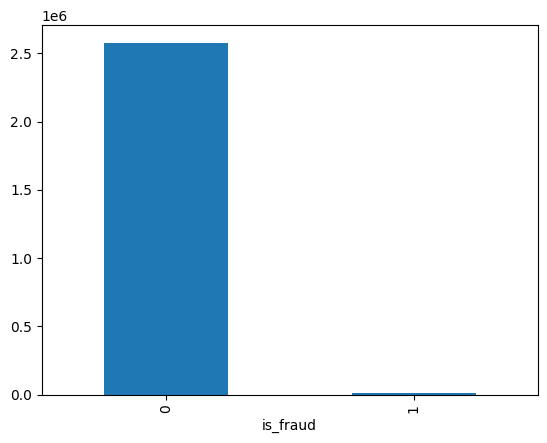

In [ ]:
#Understanding Data
import seaborn as sns
import matplotlib.pyplot as plt
df_complete.groupby('is_fraud').count()['cc_num'].plot.bar()
df_complete.describe()

In [ ]:
fraud = df_complete[df_complete['is_fraud'] == 1]
non_fraud = df_complete[df_complete['is_fraud'] == 0]

print(len(fraud), len(non_fraud))

15012 2578338


<Axes: >

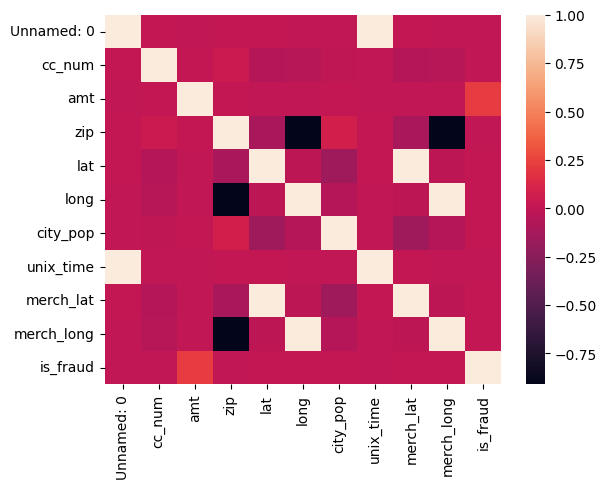

In [ ]:
df_complete.nunique()
df_complete.duplicated().sum()
sns.heatmap(df_complete[[i for i in df_complete.columns\
                         if df_complete[i].dtype == 'int64' \
                            or df_complete[i].dtype == 'float64']]\
                            .corr())


Dataset Shape:  (2593350, 23)
Balanced dataset Shape:  (30024, 23)


<Axes: xlabel='is_fraud'>

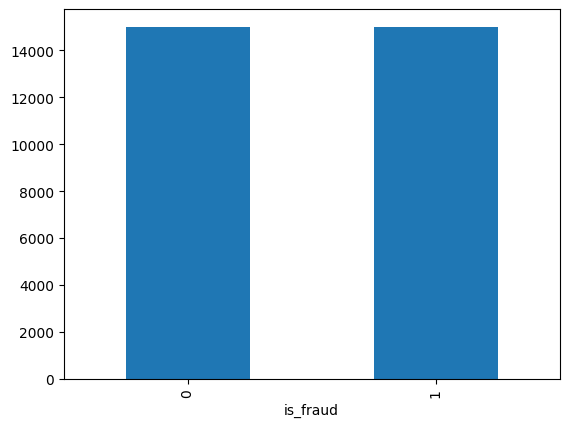

In [ ]:
# Balancing Data
print('Dataset Shape: ', df_complete.shape)
df_balanced = pd.concat([fraud, non_fraud.sample(len(fraud), random_state= 42)])
df_balanced.shape
print('Balanced dataset Shape: ', df_balanced.shape)
df_balanced.groupby('is_fraud').count()['cc_num'].plot.bar()



In [ ]:
# Dropping columns not relevant for this case
columns_dropped = ['Unnamed: 0',
                   'merchant',
                   'cc_num',
                   'first',
                   'last',
                   'gender',
                   'trans_num',
                   'unix_time',
                   'street',
                   'merch_lat',
                   'merch_long',
                   'job',
                   'zip',
                   ]

df_balanced.drop(columns = columns_dropped, inplace = True)

In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30024 entries, 2449 to 1164583
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  30024 non-null  object 
 1   category               30024 non-null  object 
 2   amt                    30024 non-null  float64
 3   city                   30024 non-null  object 
 4   state                  30024 non-null  object 
 5   lat                    30024 non-null  float64
 6   long                   30024 non-null  float64
 7   city_pop               30024 non-null  int64  
 8   dob                    30024 non-null  object 
 9   is_fraud               30024 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 2.5+ MB


In [ ]:
df_balanced['trans_date_trans_time'] = pd.to_datetime(df_balanced['trans_date_trans_time'])
df_balanced['dob'] = pd.to_datetime(df_balanced['dob'])
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30024 entries, 2449 to 1164583
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  30024 non-null  datetime64[ns]
 1   category               30024 non-null  object        
 2   amt                    30024 non-null  float64       
 3   city                   30024 non-null  object        
 4   state                  30024 non-null  object        
 5   lat                    30024 non-null  float64       
 6   long                   30024 non-null  float64       
 7   city_pop               30024 non-null  int64         
 8   dob                    30024 non-null  datetime64[ns]
 9   is_fraud               30024 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df_balanced['trans_date_trans_time'] = df_balanced['trans_date_trans_time'].dt.hour
df_balanced = df_balanced.rename(columns = {'trans_date_trans_time': 'hour_transaction'})


In [ ]:
def get_tod(hour):
    if 4 < hour['hour_transaction'] <= 12:
        ans = 'morning'
    elif 12 < hour['hour_transaction'] <= 20:
        ans = 'afternoon'
    elif hour['hour_transaction'] <= 4 or hour['hour_transaction'] > 20:
        ans = 'night'
    return ans

In [ ]:
df_balanced['hour_transaction'] = df_balanced.apply(get_tod, axis = 1)

In [ ]:
# Now, about 'dob' (day of birth), we can get the age of the user
df_balanced['dob']= df_balanced['dob'].dt.year
df_balanced = df_balanced.rename(columns = {'dob': 'age'})
from datetime import datetime
df_balanced['age'] = datetime.now().year - df_balanced['age']
df_balanced[df_balanced['is_fraud'] == 1].groupby('age').count()['is_fraud']

age
19     14
20     64
21     42
23    116
24    114
     ... 
95     86
96     82
97     94
98     50
99     22
Name: is_fraud, Length: 80, dtype: int64

**Label Encoding**

In [ ]:
#Using label encoding for categorical data
NUMERICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'int64'\
                      or df_balanced[i].dtype =='int32' \
                      or df_balanced[i].dtype =='float64']
CATEGORICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'object']

In [ ]:
NUMERICAL_FEATURES

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']

In [ ]:
CATEGORICAL_FEATURES

['hour_transaction', 'category', 'city', 'state']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(df_balanced[CATEGORICAL_FEATURES])

df_balanced[CATEGORICAL_FEATURES] = encoder.transform(df_balanced[CATEGORICAL_FEATURES])

In [ ]:
df_balanced.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,2.0,4.0,281.06,165.0,27.0,35.9946,-81.7266,885,36,1
2472,2.0,2.0,11.52,725.0,43.0,29.4400,-98.4590,1595797,64,1
2523,2.0,4.0,276.31,725.0,43.0,29.4400,-98.4590,1595797,64,1
2546,2.0,2.0,7.03,165.0,27.0,35.9946,-81.7266,885,36,1
2553,2.0,4.0,275.73,725.0,43.0,29.4400,-98.4590,1595797,64,1


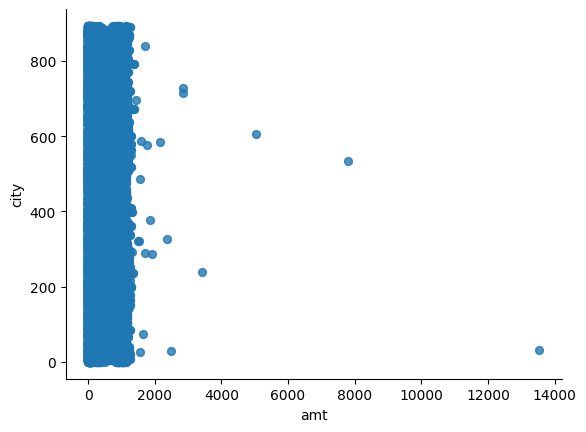

In [ ]:
# @title amt vs city

from matplotlib import pyplot as plt
df_balanced.plot(kind='scatter', x='amt', y='city', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_balanced[['is_fraud', 'age']] = df_balanced[['is_fraud', 'age']].astype('float64')

**Scaling Dataset**

<Axes: >

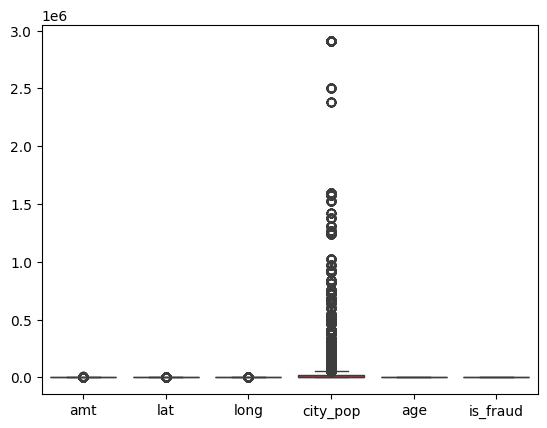

In [ ]:
sns.boxplot(df_balanced[NUMERICAL_FEATURES])

In [ ]:
df_balanced.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,2.0,4.0,281.06,165.0,27.0,35.9946,-81.7266,885,36.0,1.0
2472,2.0,2.0,11.52,725.0,43.0,29.4400,-98.4590,1595797,64.0,1.0
2523,2.0,4.0,276.31,725.0,43.0,29.4400,-98.4590,1595797,64.0,1.0
2546,2.0,2.0,7.03,165.0,27.0,35.9946,-81.7266,885,36.0,1.0
2553,2.0,4.0,275.73,725.0,43.0,29.4400,-98.4590,1595797,64.0,1.0


In [ ]:
#And not all of them seem to follow a gaussian normal distribution, so i'm using normal minmax scaler.

# Using min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_balanced)
df_scaled = pd.DataFrame(df_scaled)

In [ ]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.307692,0.020690,0.18477,0.54,0.342164,0.859026,0.000297,0.209877,1.0
1,1.0,0.153846,0.000777,0.81187,0.86,0.201707,0.687801,0.549003,0.555556,1.0
2,1.0,0.307692,0.020339,0.81187,0.86,0.201707,0.687801,0.549003,0.555556,1.0
3,1.0,0.153846,0.000445,0.18477,0.54,0.342164,0.859026,0.000297,0.209877,1.0
4,1.0,0.307692,0.020296,0.81187,0.86,0.201707,0.687801,0.549003,0.555556,1.0


In [ ]:
last_column = df_scaled.shape[1]-1

In [ ]:
print(f"Not fraud: {df_scaled[df_scaled[last_column] == 0].count()[last_column]}")
print(f"Fraud: {df_scaled[df_scaled[last_column] == 1].count()[last_column]}")

Not fraud: 15012
Fraud: 15012


In [ ]:
print(df_scaled.shape)
print(df_balanced.shape)

(30024, 10)
(30024, 10)


In [ ]:
df_scaled.rename(columns={last_column: 'is_fraud'}, inplace=True)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,is_fraud
0,1.0,0.307692,0.020690,0.18477,0.54,0.342164,0.859026,0.000297,0.209877,1.0
1,1.0,0.153846,0.000777,0.81187,0.86,0.201707,0.687801,0.549003,0.555556,1.0
2,1.0,0.307692,0.020339,0.81187,0.86,0.201707,0.687801,0.549003,0.555556,1.0
3,1.0,0.153846,0.000445,0.18477,0.54,0.342164,0.859026,0.000297,0.209877,1.0
4,1.0,0.307692,0.020296,0.81187,0.86,0.201707,0.687801,0.549003,0.555556,1.0


**Modeling**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,is_fraud
0,1.0,0.307692,0.020690,0.18477,0.54,0.342164,0.859026,0.000297,0.209877,1.0
1,1.0,0.153846,0.000777,0.81187,0.86,0.201707,0.687801,0.549003,0.555556,1.0
2,1.0,0.307692,0.020339,0.81187,0.86,0.201707,0.687801,0.549003,0.555556,1.0
3,1.0,0.153846,0.000445,0.18477,0.54,0.342164,0.859026,0.000297,0.209877,1.0
4,1.0,0.307692,0.020296,0.81187,0.86,0.201707,0.687801,0.549003,0.555556,1.0


In [ ]:
# X = feature values, all the columns except the last column
X = df_scaled.drop(columns = 'is_fraud')

# y = target values, last column of the data frame
y = df_scaled['is_fraud']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Now let's define a function to get the predictions and set the threshold

def predict(model, test_set, threshold):
    predictions = model.predict(test_set)
    pred_threshold = model.predict_proba(test_set)
    test_set["prediction"] = predictions
    test_set["pred_threshold"] = (pred_threshold >= threshold)[:, 1].astype(float)
    return test_set

In [ ]:
# Use 0.4 as threshold for LR model
predict(model, x_test, 0.4)

NameError: name 'predict' is not defined

In [ ]:
y_test = pd.DataFrame(y_test)
x_test["real"] = y_test["is_fraud"]
x_test.head(5)

,hour_transaction,category,amt,city,state,lat,long,city_pop,age,real
12362,1.0,0.307692,0.027505,0.170213,0.72,0.312078,0.719309,0.000598,0.407407,1.0
14003,1.0,0.846154,0.067015,0.379619,0.50,0.254036,0.784616,0.001565,0.209877,1.0
26405,0.0,0.538462,0.000598,0.674132,0.62,0.451067,0.931971,0.000837,0.135802,0.0
18598,0.0,0.076923,0.003750,0.982083,0.30,0.401713,0.808864,0.000589,0.185185,0.0
4605,0.5,0.692308,0.003638,0.404255,0.58,0.464347,0.702877,0.000358,0.950617,1.0


In [ ]:
print(classification_report(x_test['real'], x_test['prediction']))

KeyError: 'prediction'

## **Adding Transparency**

In [ ]:
!pip install shap
import xgboost
import shap

In [ ]:
df_balanced.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,2.0,4.0,281.06,165.0,27.0,35.9946,-81.7266,885,36,1
2472,2.0,2.0,11.52,725.0,43.0,29.4400,-98.4590,1595797,64,1
2523,2.0,4.0,276.31,725.0,43.0,29.4400,-98.4590,1595797,64,1
2546,2.0,2.0,7.03,165.0,27.0,35.9946,-81.7266,885,36,1
2553,2.0,4.0,275.73,725.0,43.0,29.4400,-98.4590,1595797,64,1


In [ ]:
df_scaled1 = scaler.fit_transform(df_balanced)
df_scaled1 = pd.DataFrame(df_scaled1, columns=df_balanced.columns)

# X = feature values, all the columns except the last column
X = df_scaled1.drop(columns = 'is_fraud')

# y = target values, last column of the data frame
y = df_scaled1['is_fraud']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelX = xgboost.XGBRegressor().fit(x_test, y_test,)

In [ ]:
x_test.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,age
12362,1.0,0.307692,0.027505,0.170213,0.72,0.312078,0.719309,0.000598,0.407407
14003,1.0,0.846154,0.067015,0.379619,0.50,0.254036,0.784616,0.001565,0.209877
26405,0.0,0.538462,0.000598,0.674132,0.62,0.451067,0.931971,0.000837,0.135802
18598,0.0,0.076923,0.003750,0.982083,0.30,0.401713,0.808864,0.000589,0.185185
4605,0.5,0.692308,0.003638,0.404255,0.58,0.464347,0.702877,0.000358,0.950617


In [ ]:
explainer = shap.Explainer(modelX)

In [ ]:
shap_values = explainer(x_test)

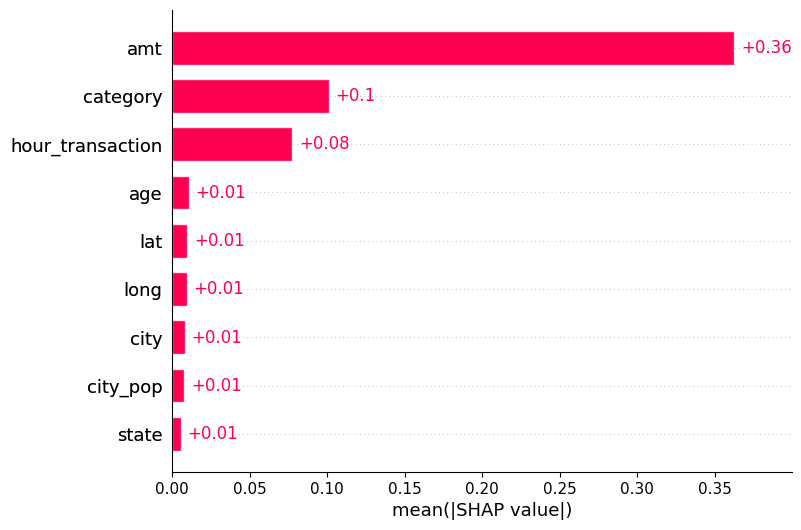

In [ ]:
# Mean contribution

shap.plots.bar(shap_values.abs.mean(0))



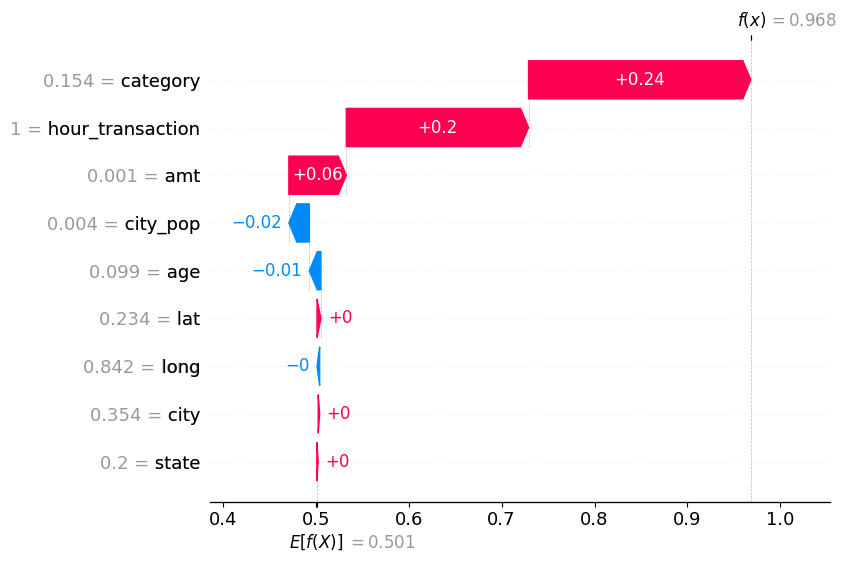

In [ ]:
shap.plots.waterfall(shap_values[11])

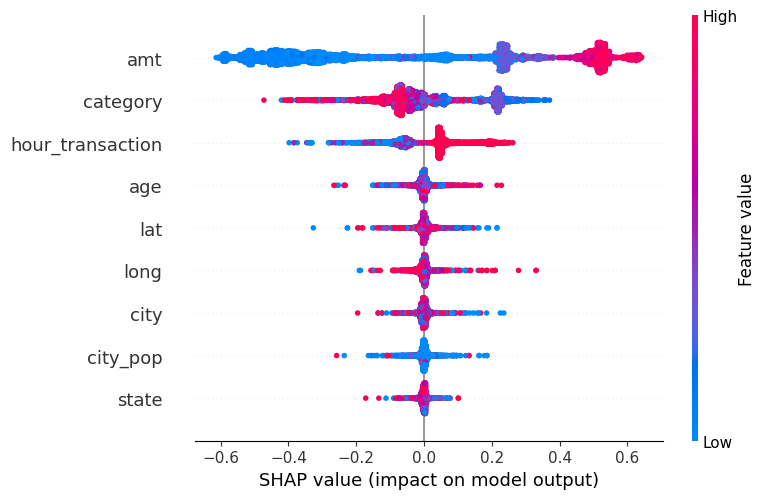

In [ ]:
shap.summary_plot(shap_values, x_test)  # Replace with your data


In [ ]:
shap_interaction = explainer.shap_interaction_values(x_test)
print(np.shape(shap_interaction))

(6005, 9, 9)


In [ ]:
# prompt: add value of shap_interactio nto a txt file and save it

with open('/content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKartik/shap_interaction.txt', 'w') as f:
  for i in range(np.shape(shap_interaction)[0]):
    for j in range(np.shape(shap_interaction)[1]):
      f.write(str(shap_interaction[i][j]) + ' ')
    f.write('\n')


TypeError: Invalid shape (6005, 9, 9) for image data

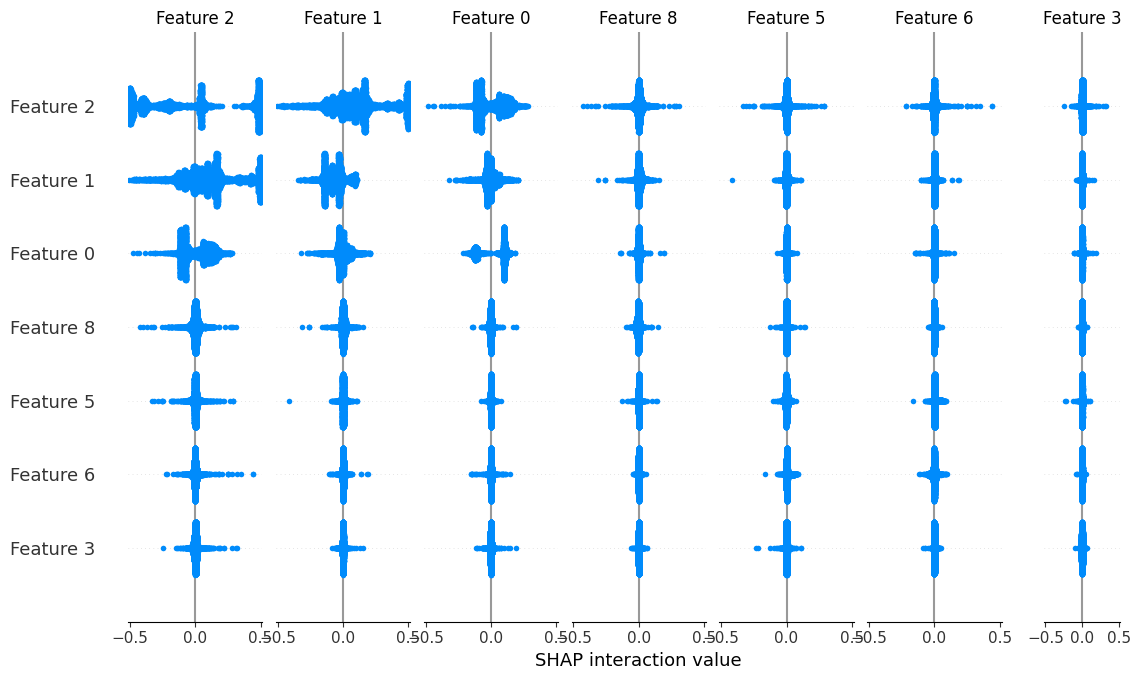

In [ ]:
# prompt: use shap_interaction values to create a heat map

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

shap.summary_plot(shap_interaction, show=False)  # Calculate additional summary statistics
plt.imshow(shap_interaction, cmap='coolwarm')
plt.colorbar()
plt.xlabel('age')
plt.ylabel('amt')
plt.title('SHAP Interaction Values Heatmap')
plt.show()


# ***TO Do***
Build story form abve chart and hence more charts .

# PDP




In [ ]:
df_scaled2 = df_balanced
df_scaled2 = pd.DataFrame(df_scaled2, columns=df_balanced.columns)
df_scaled2.head()


,hour_transaction,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,2.0,4.0,281.06,165.0,27.0,35.9946,-81.7266,885,36.0,1.0
2472,2.0,2.0,11.52,725.0,43.0,29.4400,-98.4590,1595797,64.0,1.0
2523,2.0,4.0,276.31,725.0,43.0,29.4400,-98.4590,1595797,64.0,1.0
2546,2.0,2.0,7.03,165.0,27.0,35.9946,-81.7266,885,36.0,1.0
2553,2.0,4.0,275.73,725.0,43.0,29.4400,-98.4590,1595797,64.0,1.0


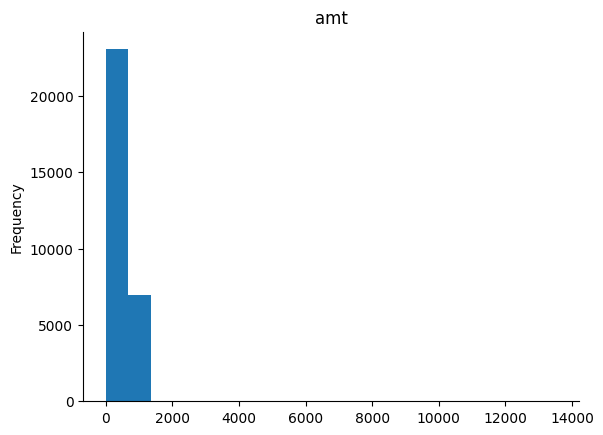

In [ ]:
# @title amt

from matplotlib import pyplot as plt
df_scaled2['amt'].plot(kind='hist', bins=20, title='amt')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# X = feature values, all the columns except the last column
X2 = df_scaled2.drop(columns = 'is_fraud')

# y = target values, last column of the data frame
Y2 = df_scaled2['is_fraud']

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)
modelZ = xgboost.XGBRegressor().fit(x_train2, y_train2)

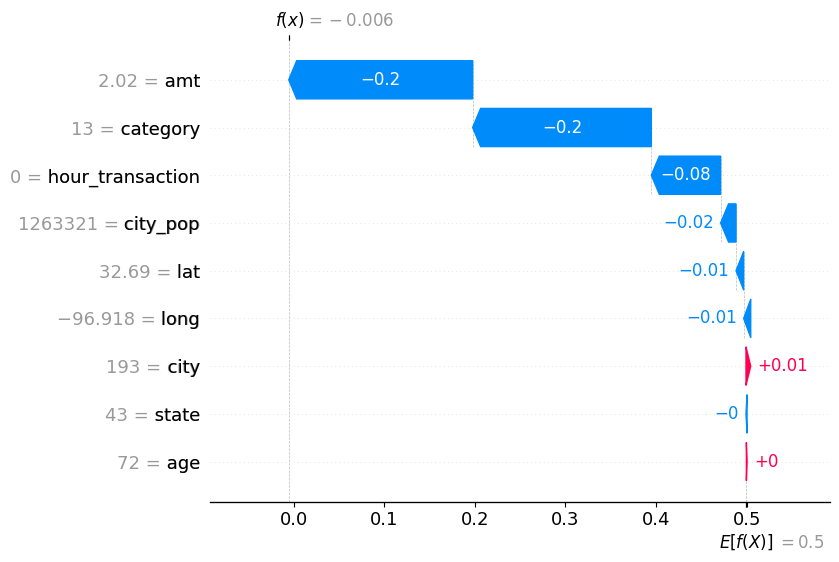

In [ ]:
explainer = shap.Explainer(modelY)
shap_values_ModelY = explainer(x_train2)
shap.plots.waterfall(shap_values_ModelY[11])

Making a dummy chart for , hour values and impact on decsion making